# Prototype Deselection
## Display background prototypes

In [1]:
import matplotlib.pyplot as plt

## Initialize datasets and model

In [2]:
from models import *
refresh_rate = 1
logger = SummaryWriter("./tensorboard/nov_30_deselection")
base_architecture = 'resnet34'
no_bounding_boxes = False
img_size = 224
prototype_shape = (2000, 128, 1, 1)
num_classes = 200
dset = CUB200(debug = False, with_ground_truth = True)
train_push_loader = dset.train_push_dataloader()

features = DeepEncoder(base_architecture, prototype_shape)
ppnet = PPNet(features=features, img_size=img_size, prototype_shape=prototype_shape,
                num_classes=num_classes, training_phase="warm",
                push_dataloader=train_push_loader, logger = logger)

trainer1 = Trainer(gpus=1, max_epochs = 5, callbacks=[], progress_bar_refresh_rate = refresh_rate)
trainer2 = Trainer(gpus=1, max_epochs = 5, callbacks=[],  progress_bar_refresh_rate = refresh_rate)
push_trainer = Trainer(gpus=1, max_epochs = 10, callbacks=[], progress_bar_refresh_rate = refresh_rate)
last_layer_trainer = Trainer(gpus=1, max_epochs = 20, callbacks=[],  progress_bar_refresh_rate = refresh_rate)

no groundtruth found


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


## Load state dict (After first push & training of last layer)

In [3]:
#sets self.prototype_indices, self.heatmaps and self.prototype_image_paths used by background_foreground_prototypes
ppnet.load_state_dict(torch.load("after_fixing_from_original.pth"), strict=False)
#ppnet.load_state_dict(torch.load("weights/after_push_fix/after_push_fix_94B5609E4C3B96CE.pth"), strict=False)
_ = ppnet.push(train_push_loader)

reinit model params
torch.Size([2000, 128, 1, 1])
torch.Size([2000, 128, 1, 1])
torch.Size([2000])


In [4]:
background_foreground = ppnet.background_foreground_prototypes()

In [5]:
trainer1.test(ppnet, dset.test_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: |          | 0/? [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'accuracy': 0.7843506932258606,
 'cluster_cost': 0.10558577626943588,
 'cross_entropy': 1.2191654443740845,
 'l1': 14.235179901123047,
 'loss': 1.2938576936721802,
 'separation_cost': 0.1399979442358017}
--------------------------------------------------------------------------------


[{'loss': 1.2938576936721802,
  'cross_entropy': 1.2191654443740845,
  'cluster_cost': 0.10558577626943588,
  'separation_cost': 0.1399979442358017,
  'l1': 14.235179901123047,
  'accuracy': 0.7843506932258606}]

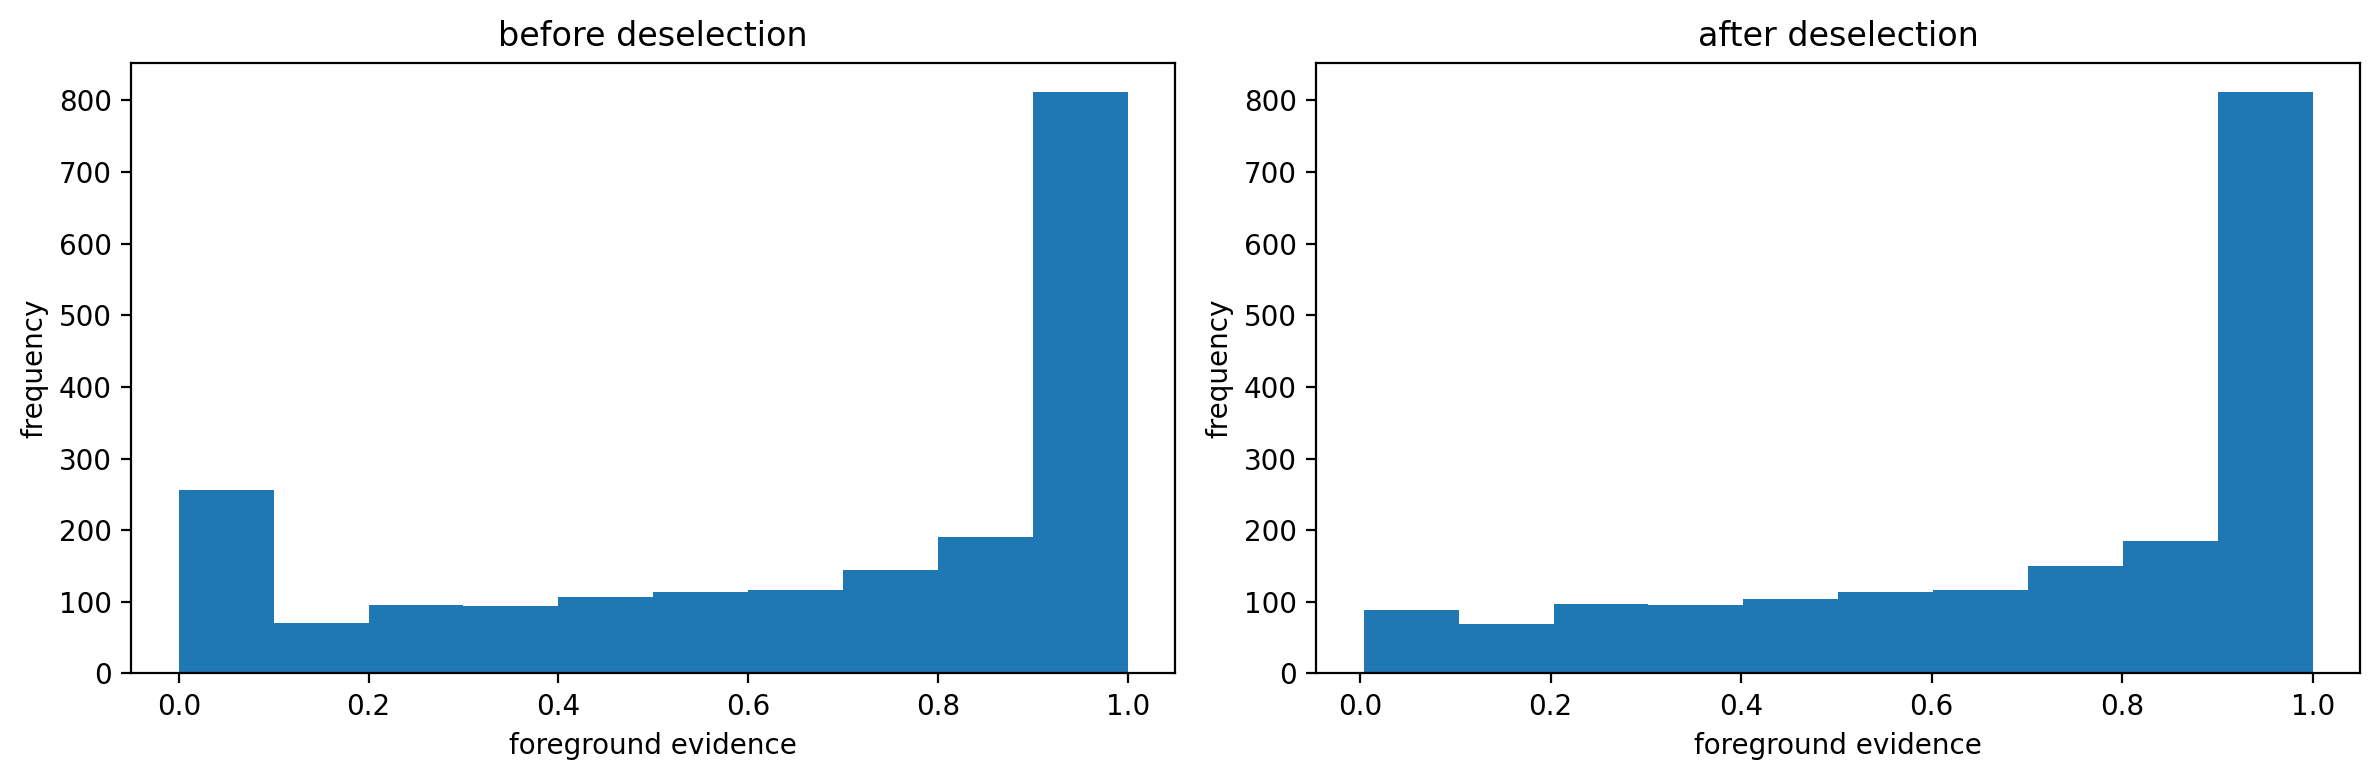

In [6]:
fig, fig1 = ppnet.plot_histograms_bgfg()

In [7]:
np.sum(np.array(background_foreground) == 0)

168

In [8]:
idxs_background_prototypes = np.where(np.array(background_foreground) == 0)[0]
prototype_indices_in_img = ppnet.prototype_indices[idxs_background_prototypes][:,1:]
heatmaps = ppnet.heatmaps[idxs_background_prototypes]
image_paths = ppnet.prototype_image_paths[idxs_background_prototypes]
groundtruth = ppnet.prototype_groundtruth_paths[idxs_background_prototypes]

In [9]:
import matplotlib.patches as patches

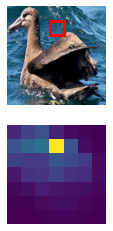

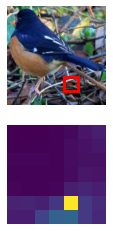

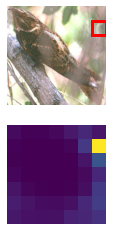

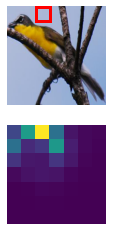

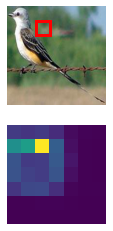

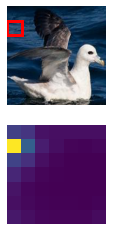

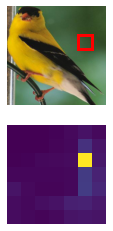

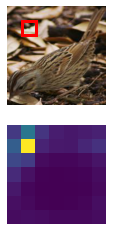

In [10]:
for i in [0, 12, 14, 11, 34, 37, 38, 106]:
    fig, ax = plt.subplots(2)
    ax[0].imshow(Image.open(image_paths[i]).resize((224,224)))
    heatmap = heatmaps[i]
    #print(nd_argmin(heatmap))
    heatmap = np.log((heatmap + 1) / (heatmap + 0.0001))
    ax[1].imshow(heatmap)
    yp, xp = prototype_indices_in_img[i]
    rect = patches.Rectangle((xp*32, yp*32), 32, 32, linewidth=3, edgecolor='r', facecolor='none')
    ax[0].add_patch(rect)
    ax[0].axis("off")
    ax[1].axis("off")
    plt.show()

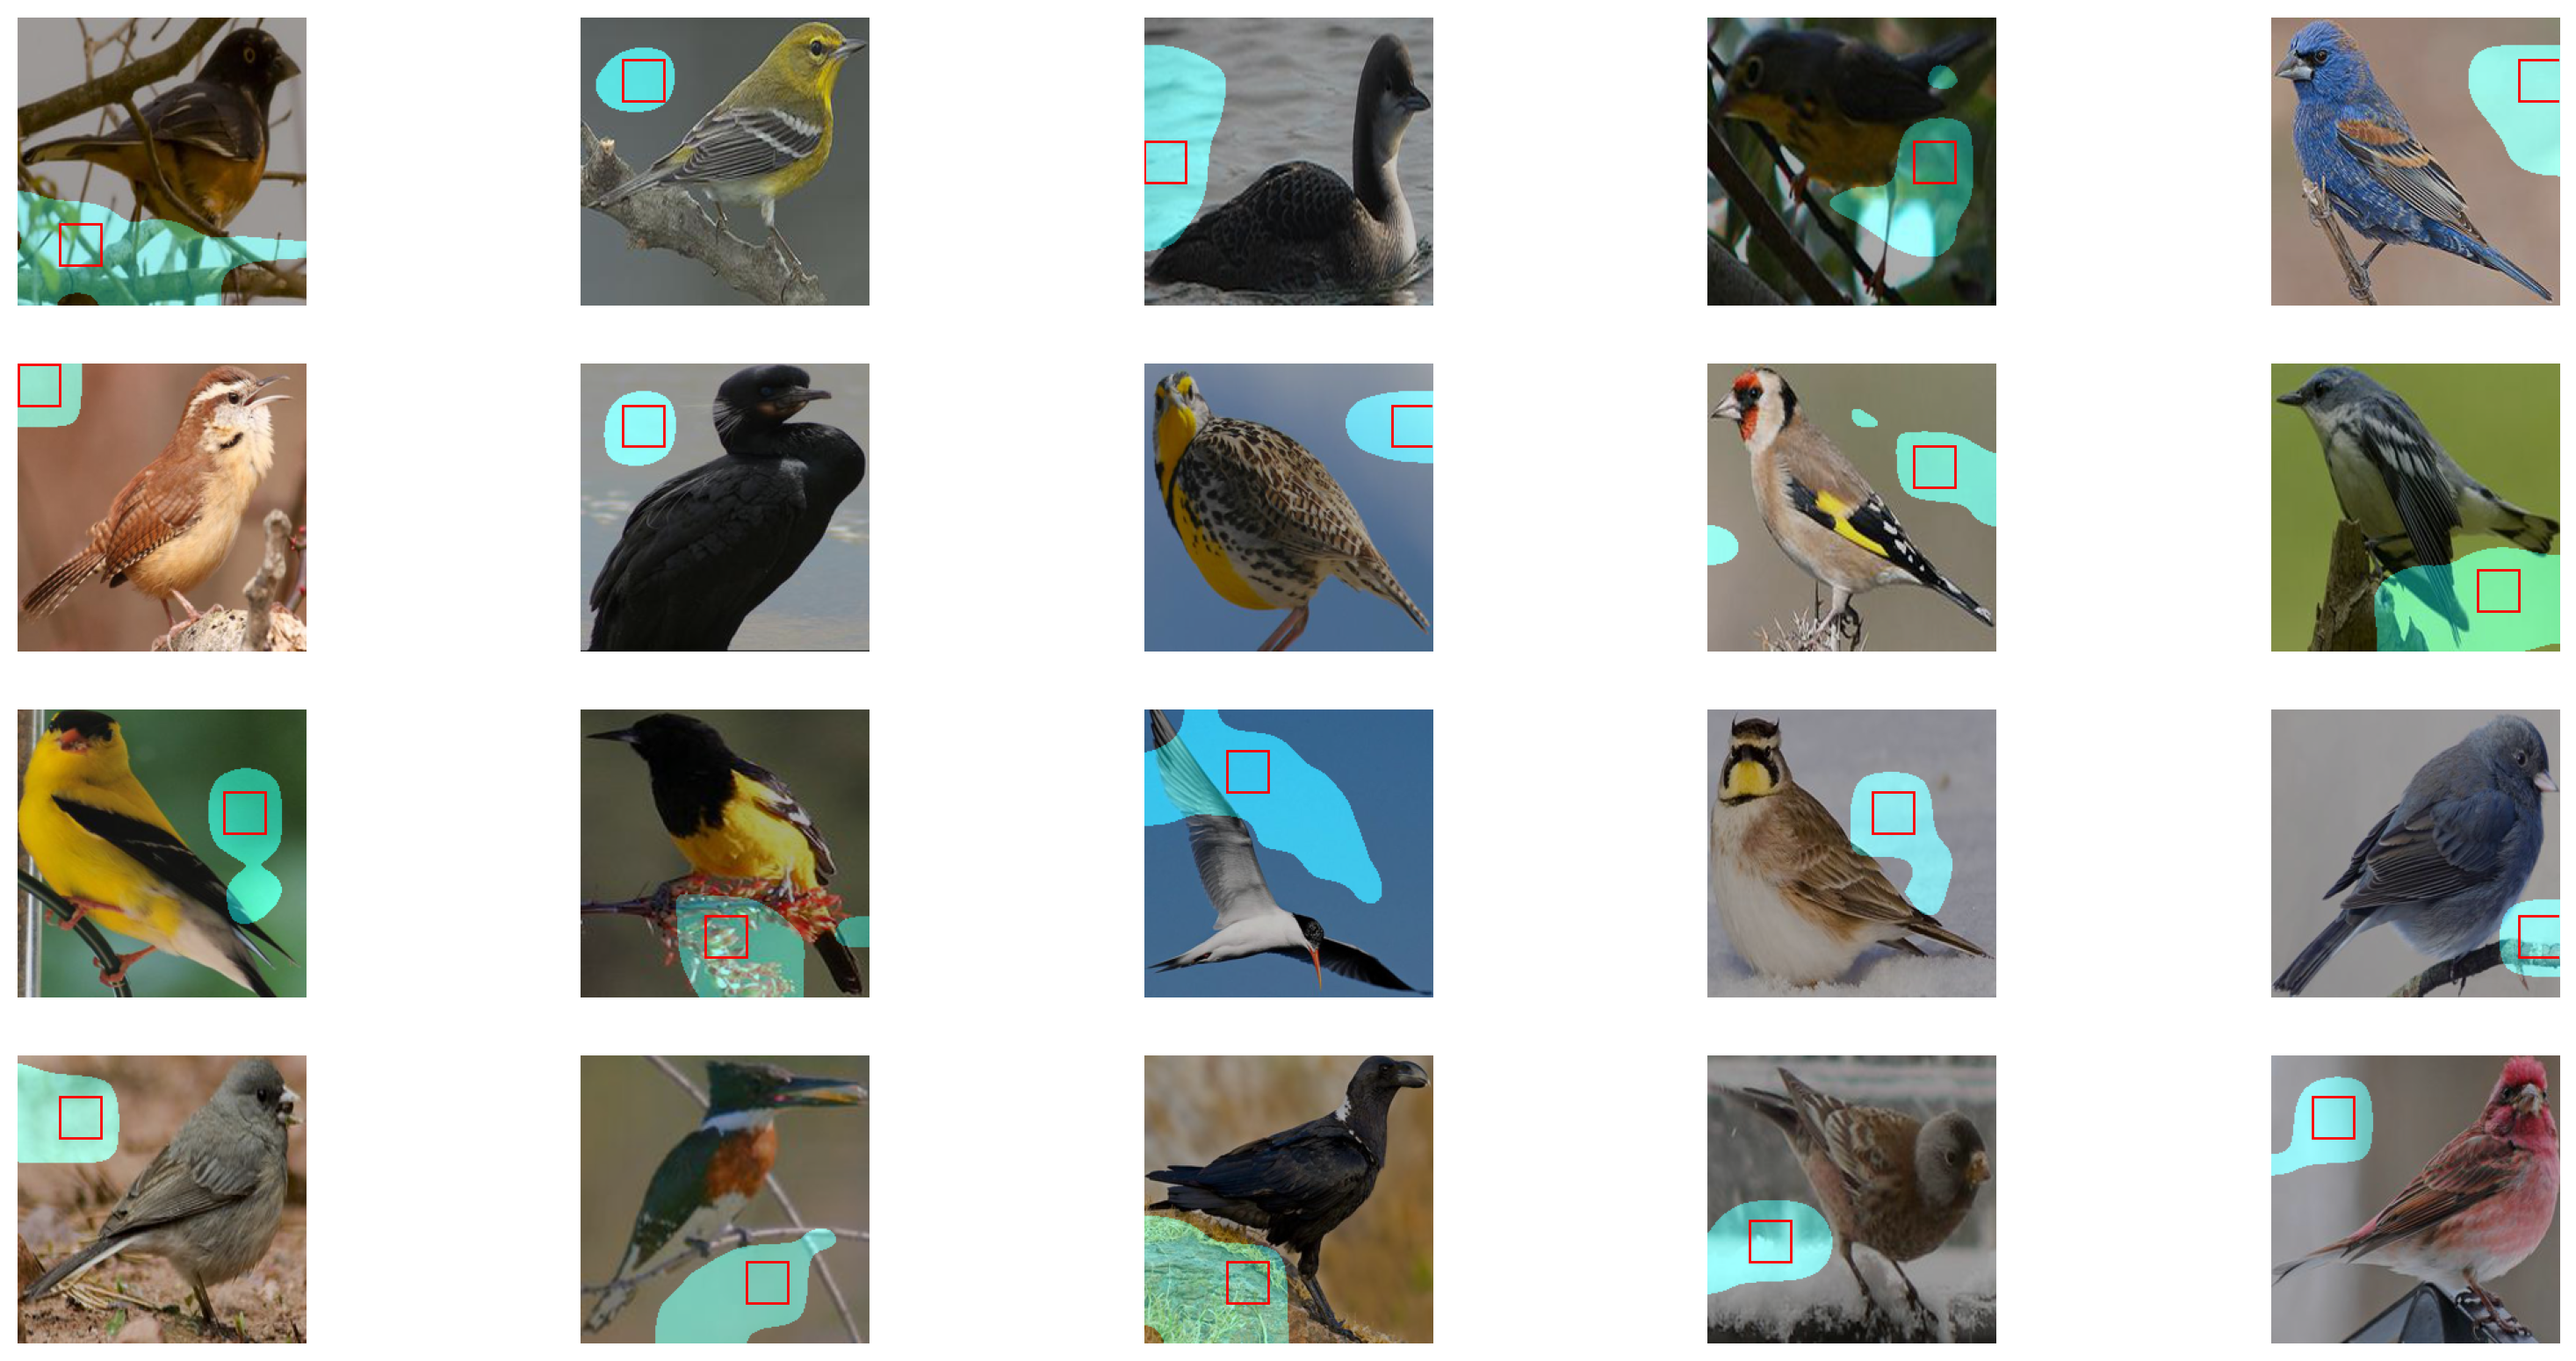

In [11]:
np.random.seed(9)
_ = ppnet.plot_background_prototypes(nx = 5, ny = 4, heatmap_threshold = .075)

# Example Prototypes of a class

In [12]:
prototype_idx = idxs_background_prototypes[12]
print(prototype_idx)

208


In [13]:
ppnet.prototype_image_paths[prototype_idx]

'/home/gerstenberger/datasets/cub200/images/train_cropped/021.Eastern_Towhee/Eastern_Towhee_0117_22741.jpg'

27


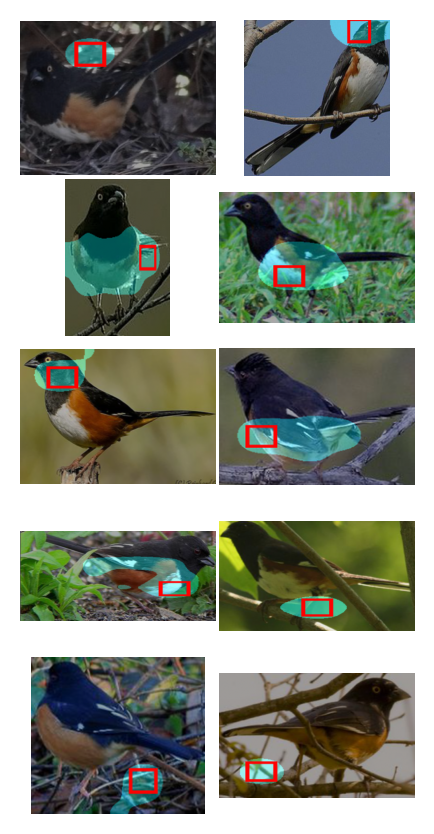

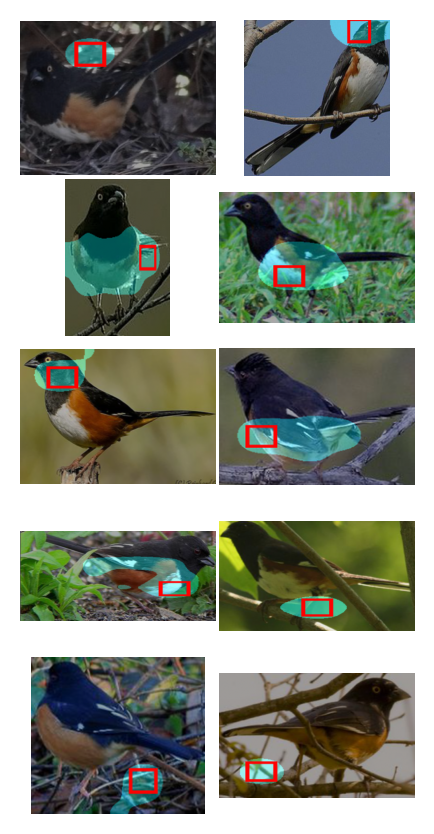

In [14]:
ppnet.plot_prototypes_of_class()

# Relevance of background prototypes for prediction

In [15]:
from models import *
logger = SummaryWriter("./tensorboard/nov_29_deselection")
base_architecture = 'resnet34'
no_bounding_boxes = False
img_size = 224
prototype_shape = (2000, 128, 1, 1)
num_classes = 200
dset = CUB200(debug = False, with_ground_truth = True)
train_push_loader = dset.train_push_dataloader()

features = DeepEncoder(base_architecture, prototype_shape)
ppnet = PPNet(features=features, img_size=img_size, prototype_shape=prototype_shape,
                num_classes=num_classes, training_phase="warm",
                push_dataloader=train_push_loader, logger = logger)

trainer1 = Trainer(gpus=1, max_epochs = 5, callbacks=[], progress_bar_refresh_rate = refresh_rate)
trainer2 = Trainer(gpus=1, max_epochs = 5, callbacks=[],  progress_bar_refresh_rate = refresh_rate)
push_trainer = Trainer(gpus=1, max_epochs = 10, callbacks=[], progress_bar_refresh_rate = refresh_rate)
last_layer_trainer = Trainer(gpus=1, max_epochs = 20, callbacks=[],  progress_bar_refresh_rate = refresh_rate)

no groundtruth found


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [16]:
#sets self.prototype_indices, self.heatmaps and self.prototype_image_paths used by background_foreground_prototypes
ppnet.load_state_dict(torch.load("after_fixing_from_original.pth"), strict=False)
#ppnet.load_state_dict(torch.load("weights/after_push_fix/after_push_fix_2F7CF792812951DB.pth"), strict=False)

_ = ppnet.push(train_push_loader)

reinit model params
torch.Size([2000, 128, 1, 1])
torch.Size([2000, 128, 1, 1])
torch.Size([2000])


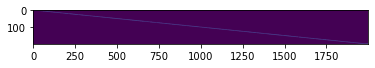

In [17]:
background_foreground = ppnet.background_foreground_prototypes()
idxs_background_prototypes = np.where(np.array(background_foreground) == 0)[0]
plt.imshow(ppnet.last_layer.weight.detach().cpu().numpy())

In [18]:
#weights between prototype and correct class logit (given each prototype is of a class)
weights = ppnet.last_layer.weight.detach().cpu().numpy()[np.where(ppnet.prototype_class_identity.cpu().detach().numpy().T)]

Text(0, 0.5, 'n prototypes')

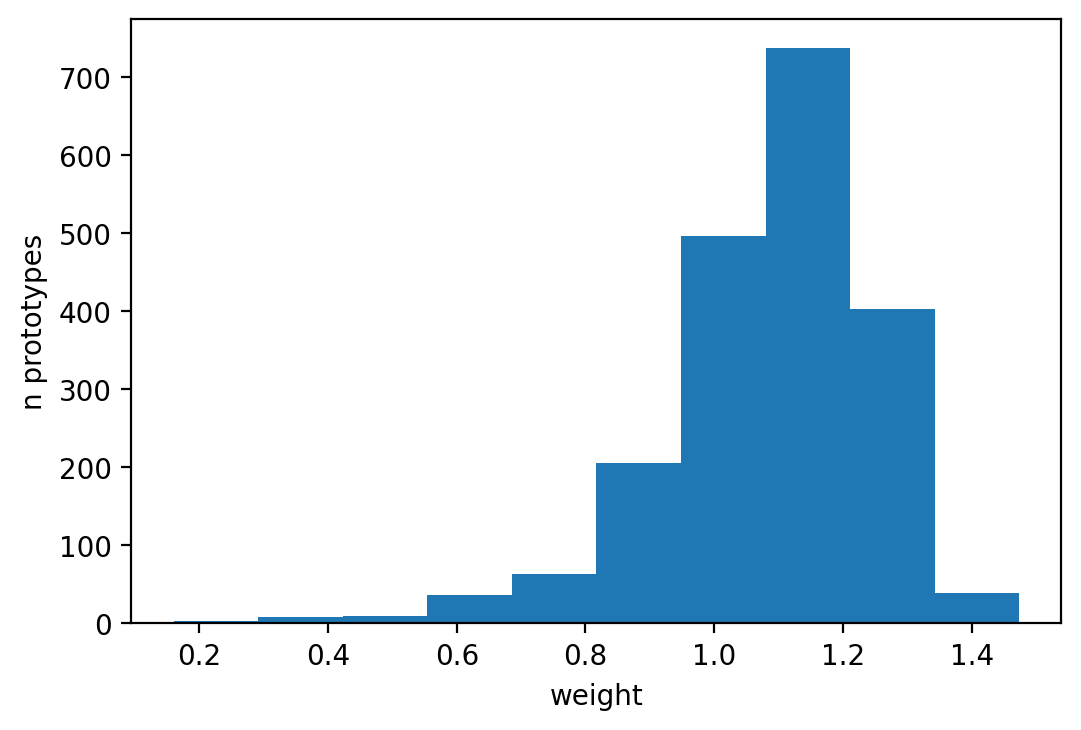

In [19]:
fig, ax = plt.subplots(1, dpi = 200)
ax.hist(weights)
ax.set_xlabel("weight")
ax.set_ylabel("n prototypes")

In [20]:
ppnet.prototype_class_identity.cpu().detach().numpy()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

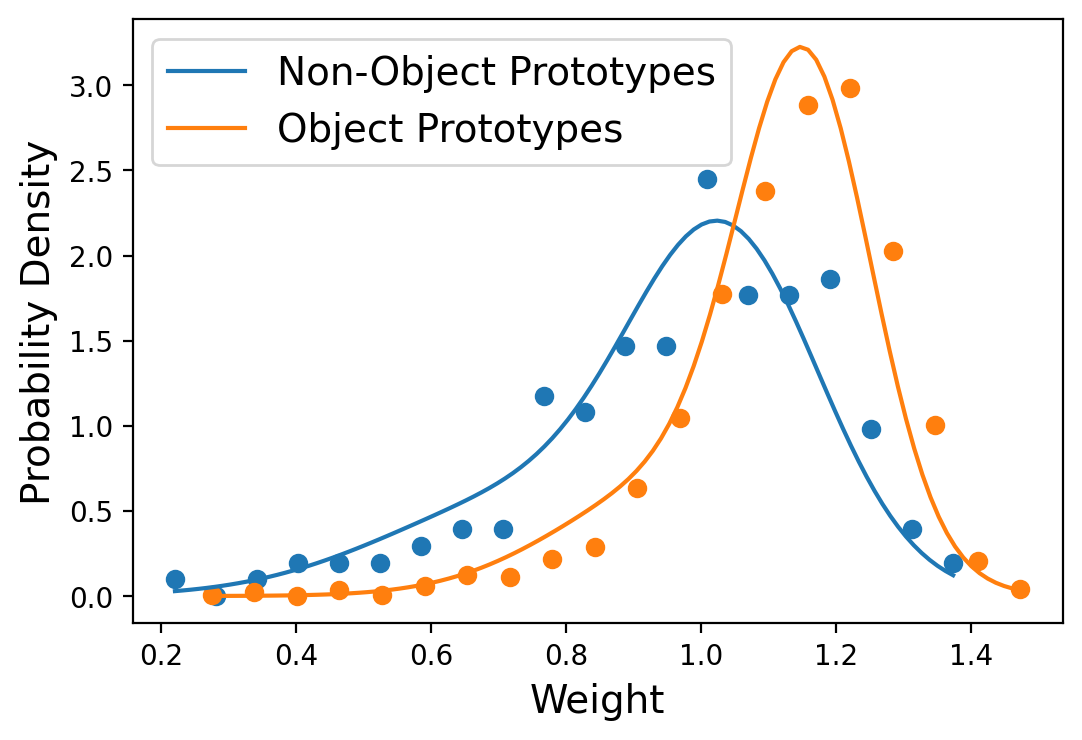

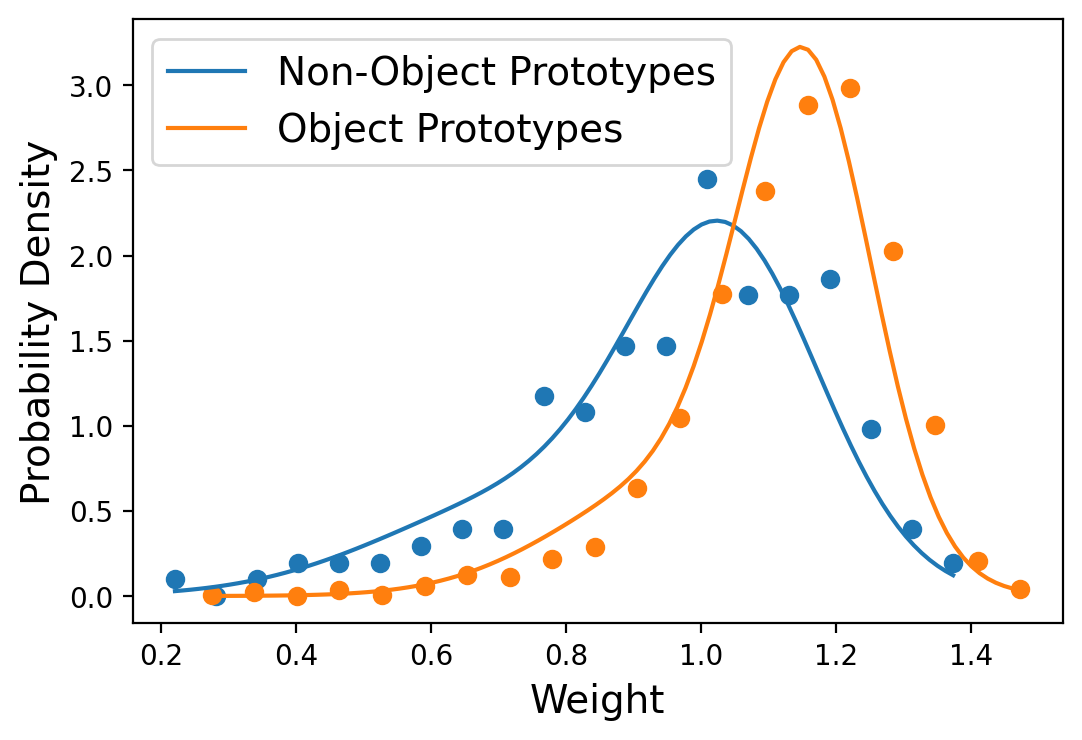

In [21]:
ppnet.plot_pdf_background_foreground_prototypes()

# Deleting prototypes

In [22]:
from models import *
logger = SummaryWriter("./tensorboard/dec_23_deselection")
base_architecture = 'resnet34'
no_bounding_boxes = False
img_size = 224
prototype_shape = [2000, 128, 1, 1]
num_classes = 200
dset = CUB200(debug = False, with_ground_truth = True)
train_push_loader = dset.train_push_dataloader()
refresh_rate = 1

features = DeepEncoder(base_architecture, prototype_shape)
ppnet = PPNet(features=features, img_size=img_size, prototype_shape=prototype_shape,
                num_classes=num_classes, training_phase="warm",
                push_dataloader=train_push_loader, logger = logger)

trainer1 = Trainer(gpus=1, max_epochs = 5, callbacks=[], progress_bar_refresh_rate = refresh_rate)
trainer2 = Trainer(gpus=1, max_epochs = 5, callbacks=[],  progress_bar_refresh_rate = refresh_rate)
push_trainer = Trainer(gpus=1, max_epochs = 10, callbacks=[], progress_bar_refresh_rate = refresh_rate)
last_layer_trainer = Trainer(gpus=1, max_epochs = 20, callbacks=[],  progress_bar_refresh_rate = refresh_rate)

no groundtruth found


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [23]:
ppnet.load_state_dict(torch.load("after_fixing_from_original.pth"), strict=False)
_ = ppnet.push(train_push_loader)

reinit model params
torch.Size([2000, 128, 1, 1])
torch.Size([2000, 128, 1, 1])
torch.Size([2000])


In [24]:
last_layer_trainer.test(ppnet, dset.test_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: |          | 0/? [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'accuracy': 0.7843506932258606,
 'cluster_cost': 0.10558577626943588,
 'cross_entropy': 1.2191654443740845,
 'l1': 14.235179901123047,
 'loss': 1.2938576936721802,
 'separation_cost': 0.1399979442358017}
--------------------------------------------------------------------------------


[{'loss': 1.2938576936721802,
  'cross_entropy': 1.2191654443740845,
  'cluster_cost': 0.10558577626943588,
  'separation_cost': 0.1399979442358017,
  'l1': 14.235179901123047,
  'accuracy': 0.7843506932258606}]

In [25]:
ppnet.num_prototypes = len(ppnet.prototype_mask)

In [26]:
ppnet.delete_prototypes(ppnet.background_prototype_indices)

In [27]:
last_layer_trainer.test(ppnet, dset.test_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: |          | 0/? [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'accuracy': 0.780234694480896,
 'cluster_cost': 0.10750744491815567,
 'cross_entropy': 1.233189344406128,
 'l1': 12.815576553344727,
 'loss': 1.3084683418273926,
 'separation_cost': 0.15010511875152588}
--------------------------------------------------------------------------------


[{'loss': 1.3084683418273926,
  'cross_entropy': 1.233189344406128,
  'cluster_cost': 0.10750744491815567,
  'separation_cost': 0.15010511875152588,
  'l1': 12.815576553344727,
  'accuracy': 0.780234694480896}]

In [28]:
ppnet.prototype_shape

[2000, 128, 1, 1]

In [29]:
ppnet.prototype_shape

[2000, 128, 1, 1]

# Masking prototypes

In [30]:
from models import *
logger = SummaryWriter("./tensorboard/dec_16_deselection")
base_architecture = 'resnet34'
no_bounding_boxes = False
img_size = 224
prototype_shape = (2000, 128, 1, 1)
num_classes = 200
dset = CUB200(debug = False, with_ground_truth = True)
train_push_loader = dset.train_push_dataloader()
refresh_rate = 1

features = DeepEncoder(base_architecture, prototype_shape)
ppnet = PPNet(features=features, img_size=img_size, prototype_shape=prototype_shape,
                num_classes=num_classes, training_phase="warm",
                push_dataloader=train_push_loader, logger = logger)

trainer1 = Trainer(gpus=1, max_epochs = 5, callbacks=[], progress_bar_refresh_rate = refresh_rate)
trainer2 = Trainer(gpus=1, max_epochs = 5, callbacks=[],  progress_bar_refresh_rate = refresh_rate)
push_trainer = Trainer(gpus=1, max_epochs = 10, callbacks=[], progress_bar_refresh_rate = refresh_rate)
last_layer_trainer = Trainer(gpus=1, max_epochs = 20, callbacks=[],  progress_bar_refresh_rate = refresh_rate)

no groundtruth found


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [31]:
ppnet.load_state_dict(torch.load("after_fixing_from_original.pth"))
_ = ppnet.push(train_push_loader)

RuntimeError: Error(s) in loading state_dict for PPNet:
	Missing key(s) in state_dict: "prototype_class_identity". 